https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82

In [1]:
from sklearn.datasets import load_iris
#save data information as variable
iris = load_iris()
#view data description and information
print(iris.DESCR)

C:\Users\lenovo\anaconda3\envs\fayyaz\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Putting Data into a Data Frame
Feature Data
To view the data more easily we can put this information into a data frame by using the Pandas library. Let’s create a data frame to store the data information about the flowers’ features first.

In [2]:
import pandas as pd
#make sure to save the data frame to a variable
data = pd.DataFrame(iris.data)
#By default print 5 rows of data
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#note: it is common practice to use underscores between words, and avoid spaces
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#put target data into data frame
target = pd.DataFrame(iris.target)
#Lets rename the column so that we know that these values refer to the target values
target = target.rename(columns = {0: 'target'})
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
df = pd.concat([data, target], axis = 1)
#note: it is common practice to name your data frame as "df", but you can name it anything as long as you are clear
#and consistent #in the code above, axis = 1 tells the data frame to add the target data frame as another column of
#the data data frame, axis = 0 would add the values as another row on the bottom
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int32
dtype: object

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


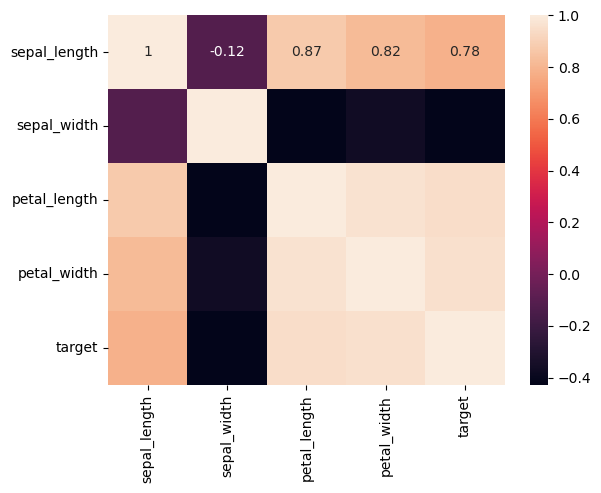

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.heatmap(df.corr(), annot = True);
#annot = True adds the numbers onto the squares

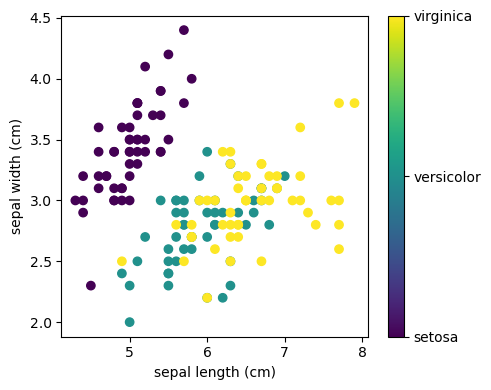

In [13]:
# The indices of the features that we are plotting (class 0 & 1)
x_index = 0
y_index = 1
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

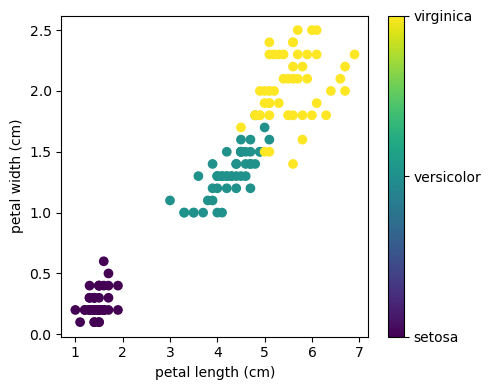

In [14]:
x_index = 2
y_index = 3
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

In [15]:
#divide our data into predictors (X) and target values (y)
X = df.copy()
y = X.pop('target')
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

#by stratifying on y we assure that the different classes are represented proportionally to the amount 
#in the total data (this makes sure that all of class 1 is not in the test group only)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
#The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling.
#The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
#The fit_transform() method does both fits and transform.

In [15]:
df.target.value_counts(normalize= True)

target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

In [16]:
from sklearn.linear_model import LogisticRegression
#create the model instance
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)
#the score, or accuracy of the model
model.score(X_test, y_test)
# Output = 0.9666666666666667
#the test score is already very high, but we can use the cross validated score to ensure the model's strength 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))
# Output = 0.9499999999999998

0.9499999999999998


In [17]:
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

,sepal_length,sepal_width,petal_length,petal_width
0,-1.102746,1.001818,-1.836891,-1.667978
1,0.402982,-0.323432,-0.277761,-0.650011
2,0.699764,-0.678386,2.114653,2.317989


In [18]:
predictions = model.predict(X_test)
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


In [19]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,9,1,0
1,0,10,0
0,0,0,10


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [21]:
probs = model.predict_proba(X_test)
#put the probabilities into a dataframe for easier viewing
Y_pp = pd.DataFrame(model.predict_proba(X_test), 
             columns=['class_0_pp', 'class_1_pp', 'class_2_pp'])
Y_pp.head()

,class_0_pp,class_1_pp,class_2_pp
0,0.000016,0.062182,9.378022e-01
1,0.958819,0.041181,5.060799e-07
2,0.147033,0.846368,6.598360e-03
3,0.983033,0.016967,2.623772e-07
4,0.970334,0.029663,2.118099e-06


In [22]:
# load the iris dataset as an example  
from sklearn.datasets import load_iris  
iris = load_iris()  
    
# store the feature matrix (X) and response vector (y)  
X = iris.data  
y = iris.target  
    
# store the feature and target names  
feature_names = iris.feature_names  
target_names = iris.target_names  
    
# printing features and target names of our dataset  
print("Feature names:", feature_names)  
print("Target names:", target_names)  
    
# X and y are numpy arrays  
print("\nType of X is:", type(X))  
    
# printing first 5 input rows  
print("\nFirst 5 rows of X:\n", X[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Type of X is: <class 'numpy.ndarray'>

First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [23]:
# load the iris dataset as an example 
from sklearn.datasets import load_iris 
iris = load_iris() 
  
# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
  
# printing the shapes of the new X objects 
print(X_train.shape) 
print(X_test.shape) 
  
# printing the shapes of the new y objects 
print(y_train.shape) 
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [24]:
# load the iris dataset as an example 
from sklearn.datasets import load_iris 
iris = load_iris() 
  
# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
  
# training the model on training set 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = knn.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred)) 
  
# making prediction for out of sample data 
sample = [[3, 5, 4, 2], [2, 3, 5, 4]] 
preds = knn.predict(sample) 
pred_species = [iris.target_names[p] for p in preds] 
print("Predictions:", pred_species) 

kNN model accuracy: 0.9833333333333333
Predictions: ['versicolor', 'virginica']


In [25]:
# import packages 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
  
# importing data 
df = pd.read_csv('headbrain1.csv') 
  
# head of the data 
print(df.head()) 
  
X= df['Head Size(cm^3)'] 
y=df['Brain Weight(grams)'] 
  
# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, test_size=0.25, shuffle=True) 
# printing out train and test sets 
  
print('X_train : ') 
print(X_train.head()) 
print('') 
print('X_test : ') 
print(X_test.head()) 
print('') 
print('y_train : ') 
print(y_train.head()) 
print('') 
print('y_test : ') 
print(y_test.head())

   Head Size(cm^3)  Brain Weight(grams)
0             4512                 1530
1             3738                 1297
2             4261                 1335
3             3777                 1282
4             4177                 1590
X_train : 
99     3478
52     4270
184    3479
139    3171
107    3399
Name: Head Size(cm^3), dtype: int64

X_test : 
66     3415
113    3594
135    3436
227    4204
68     4430
Name: Head Size(cm^3), dtype: int64

y_train : 
99     1270
52     1335
184    1160
139    1127
107    1226
Name: Brain Weight(grams), dtype: int64

y_test : 
66     1310
113    1290
135    1235
227    1380
68     1510
Name: Brain Weight(grams), dtype: int64
